In [ ]:
import numpy as np
import torch
import torch.nn as nn
import time

In [ ]:
def conv1d_naive(input_signal, kernel, padding=0, stride=1):
    input_len = len(input_signal)
    kernel_len = len(kernel)

    padded_input = np.pad(input_signal, (padding, padding), 'constant')

    output_len = (len(padded_input) - kernel_len) // stride + 1
    output = np.zeros(output_len)

    for i in range(output_len):
        start = i * stride
        end = start + kernel_len
        output[i] = np.sum(padded_input[start:end] * kernel)

    return output

In [ ]:
# Example usage
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
kernel_1d = np.array([1, 0, -1])


In [ ]:
print("Input Signal:", input_signal)
print("Kernel:", kernel_1d)

output_no_pad = conv1d_naive(input_signal, kernel_1d)
print("Output (no padding, stride=1):", output_no_pad)

output_pad = conv1d_naive(input_signal, kernel_1d, padding=1)
print("Output (padding=1, stride=1):", output_pad)

output_stride = conv1d_naive(input_signal, kernel_1d, stride=2)
print("Output (no padding, stride=2):", output_stride)


Input Signal: [ 1  2  3  4  5  6  7  8  9 10]
Kernel: [ 1  0 -1]
Output (no padding, stride=1): [-2. -2. -2. -2. -2. -2. -2. -2.]
Output (padding=1, stride=1): [-2. -2. -2. -2. -2. -2. -2. -2. -2.  9.]
Output (no padding, stride=2): [-2. -2. -2. -2.]


In [ ]:

print("""
Padding:
- Padding adds extra values (usually zeros) around the input.
- It helps control the output size and prevent information loss at the edges.

Stride:
- Stride determines how many steps the kernel moves at each iteration.
- A larger stride reduces the output size.
""")


Padding:
- Padding adds extra values (usually zeros) around the input.
- It helps control the output size and prevent information loss at the edges.

Stride:
- Stride determines how many steps the kernel moves at each iteration.
- A larger stride reduces the output size.



In [ ]:
def conv2d_naive(input_image, kernel, padding=0, stride=1):
    input_height, input_width = input_image.shape
    kernel_height, kernel_width = kernel.shape

    padded_input = np.pad(input_image, ((padding, padding), (padding, padding)), 'constant')

    output_height = (padded_input.shape[0] - kernel_height) // stride + 1
    output_width = (padded_input.shape[1] - kernel_width) // stride + 1
    output = np.zeros((output_height, output_width))

    for i in range(output_height):
        for j in range(output_width):
            start_h = i * stride
            end_h = start_h + kernel_height
            start_w = j * stride
            end_w = start_w + kernel_width
            output[i, j] = np.sum(padded_input[start_h:end_h, start_w:end_w] * kernel)

    return output

In [ ]:
# Example usage
input_image = np.array([[1, 2, 3, 4],
                        [5, 6, 7, 8],
                        [9, 10, 11, 12],
                        [13, 14, 15, 16]])
kernel_2d = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])

print("Input Image:\n", input_image)
print("Kernel:\n", kernel_2d)

output_no_pad = conv2d_naive(input_image, kernel_2d)
print("Output (no padding, stride=1):\n", output_no_pad)

output_pad = conv2d_naive(input_image, kernel_2d, padding=1)
print("Output (padding=1, stride=1):\n", output_pad)

output_stride = conv2d_naive(input_image, kernel_2d, stride=2)
print("Output (no padding, stride=2):\n", output_stride)

Input Image:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Kernel:
 [[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]
Output (no padding, stride=1):
 [[-6. -6.]
 [-6. -6.]]
Output (padding=1, stride=1):
 [[ -8.  -4.  -4.  10.]
 [-18.  -6.  -6.  21.]
 [-30.  -6.  -6.  33.]
 [-24.  -4.  -4.  26.]]
Output (no padding, stride=2):
 [[-6.]]


In [ ]:
# 1D Convolution in PyTorch
def conv1d_torch(input_signal):
    # Shape: [batch, channel, length]
    input_signal_torch = torch.tensor(input_signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Shape: [out_channels, in_channels, kernel_size]
    kernel_torch = torch.tensor(kernel_1d, dtype=torch.float32).view(1, 1, 3)

    # Apply convolution
    conv1d = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=0, stride=1)
    with torch.no_grad():
        conv1d.weight.copy_(kernel_torch)
        conv1d.bias.zero_()

    output_torch = conv1d(input_signal_torch)
    return output_torch.squeeze()

# Example usage with different parameters
output_torch_1d = conv1d_torch(input_signal)  # No padding, stride=1
print("PyTorch 1D Convolution Output (no padding, stride=1):\n", output_torch_1d.detach().numpy())

# Create input tensor once for padding and stride examples
input_signal_torch = torch.tensor(input_signal, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
kernel_torch = torch.tensor(kernel_1d, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

# Add padding
conv1d_pad = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=1, stride=1)
with torch.no_grad():
    conv1d_pad.weight.copy_(kernel_torch)
    conv1d_pad.bias.zero_()
output_torch_1d_pad = conv1d_pad(input_signal_torch).squeeze()
print("PyTorch 1D Convolution Output (padding=1, stride=1):\n", output_torch_1d_pad.detach().numpy())

# Add stride
conv1d_stride = nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, padding=0, stride=2)
with torch.no_grad():
    conv1d_stride.weight.copy_(kernel_torch)
    conv1d_stride.bias.zero_()
output_torch_1d_stride = conv1d_stride(input_signal_torch).squeeze()
print("PyTorch 1D Convolution Output (no padding, stride=2):\n", output_torch_1d_stride.detach().numpy())

PyTorch 1D Convolution Output (no padding, stride=1):
 [-2. -2. -2. -2. -2. -2. -2. -2.]
PyTorch 1D Convolution Output (padding=1, stride=1):
 [-2. -2. -2. -2. -2. -2. -2. -2. -2.  9.]
PyTorch 1D Convolution Output (no padding, stride=2):
 [-2. -2. -2. -2.]


In [ ]:
# 2D Convolution in PyTorch
def conv2d_torch(input_image):
    # Shape: [batch, channel, height, width]
    input_image_torch = torch.tensor(input_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # Shape: [out_channels, in_channels, kernel_height, kernel_width]
    kernel_torch = torch.tensor(kernel_2d, dtype=torch.float32).view(1, 1, 3, 3)

    # Apply convolution
    conv2d = nn.Conv2d(in_channels=1, out_channels=1, kernel_size=3, padding=0, stride=1)
    with torch.no_grad():
        conv2d.weight.copy_(kernel_torch)
        conv2d.bias.zero_()

    output_torch = conv2d(input_image_torch)
    return output_torch.squeeze()

# Example usage
output_torch_2d = conv2d_torch(input_image)
print("PyTorch 2D Convolution Output (no padding, stride=1):\n", output_torch_2d.detach().numpy())

output_torch_2d_pad = conv2d_torch(input_image)
print("PyTorch 2D Convolution Output (padding=1, stride=1):\n", output_torch_2d_pad.detach().numpy())

output_torch_2d_stride = conv2d_torch(input_image)
print("PyTorch 2D Convolution Output (no padding, stride=2):\n", output_torch_2d_stride.detach().numpy())

print("""
PyTorch provides optimized implementations of convolution.
- torch.nn.Conv1d for 1D convolution.
- torch.nn.Conv2d for 2D convolution.
- Parameters include in_channels, out_channels, kernel_size, padding, stride, bias.
""")

PyTorch 2D Convolution Output (no padding, stride=1):
 [[-6. -6.]
 [-6. -6.]]
PyTorch 2D Convolution Output (padding=1, stride=1):
 [[-6. -6.]
 [-6. -6.]]
PyTorch 2D Convolution Output (no padding, stride=2):
 [[-6. -6.]
 [-6. -6.]]

PyTorch provides optimized implementations of convolution.
- torch.nn.Conv1d for 1D convolution.
- torch.nn.Conv2d for 2D convolution.
- Parameters include in_channels, out_channels, kernel_size, padding, stride, bias.



In [ ]:
# Simple scalar example
x = torch.tensor([2.0], requires_grad=True)
y = x ** 2
y.backward()
print(f"d(x^2)/dx at x=2: {x.grad}")  # Should be 4

# Reset gradients
x.grad.zero_()

# More complex example
z = torch.sin(x) * torch.exp(x)
z.backward()
print(f"d(sin(x)*exp(x))/dx at x=2: {x.grad}")

d(x^2)/dx at x=2: tensor([4.])
d(sin(x)*exp(x))/dx at x=2: tensor([3.6439])


In [ ]:
def visualize_comp_graph():
    x = torch.tensor(2.0, requires_grad=True)
    a = x ** 2
    b = torch.sin(a)
    c = torch.exp(b)
    y = c * x

    print("Computational Graph Example:")
    print(f"x = {x.item()}")
    print(f"a = x² = {a.item()}")
    print(f"b = sin(a) = {b.item()}")
    print(f"c = exp(b) = {c.item()}")
    print(f"y = c * x = {y.item()}")

    # Compute gradients
    y.backward()
    print(f"\nGradient at x: {x.grad}")

visualize_comp_graph()

Computational Graph Example:
x = 2.0
a = x² = 4.0
b = sin(a) = -0.756802499294281
c = exp(b) = 0.4691641926765442
y = c * x = 0.9383283853530884

Gradient at x: -1.9841651916503906


In [ ]:
!pip install torchviz

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Function, grad, gradcheck
import time
import graphviz
from torchviz import make_dot

In [ ]:
def visualize_with_graphviz():
    x = torch.tensor(2.0, requires_grad=True)
    a = x ** 2
    b = torch.sin(a)
    c = torch.exp(b)
    y = c * x

    # Create visualization
    dot = make_dot(y, params={"x": x})
    dot.render("computational_graph", format="png")

    print("""
    Computational Graph Visualization:
    - Nodes represent operations (functions)
    - Edges represent data flow
    - Leaf nodes are inputs
    - Root node is the output
    - Gradient flows backward through this graph
    """)

    # Show intermediate values and gradients
    y.backward()
    print("\nForward Pass Values:")
    print(f"x = {x.item():.4f}")
    print(f"a = x² = {a.item():.4f}")
    print(f"b = sin(a) = {b.item():.4f}")
    print(f"c = exp(b) = {c.item():.4f}")
    print(f"y = c * x = {y.item():.4f}")

    print("\nBackward Pass Gradients:")
    print(f"dy/dx = {x.grad.item():.4f}")

visualize_with_graphviz()


    Computational Graph Visualization:
    - Nodes represent operations (functions)
    - Edges represent data flow
    - Leaf nodes are inputs
    - Root node is the output
    - Gradient flows backward through this graph
    

Forward Pass Values:
x = 2.0000
a = x² = 4.0000
b = sin(a) = -0.7568
c = exp(b) = 0.4692
y = c * x = 0.9383

Backward Pass Gradients:
dy/dx = -1.9842


# Custom Autograd Functions

In [ ]:
class CustomReLU(Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

# Test custom ReLU
custom_relu = CustomReLU.apply
x = torch.randn(5, requires_grad=True)
y = custom_relu(x)
print(f"Input: {x.data}")
print(f"Output: {y.data}")

# Compute gradients
z = y.sum()
z.backward()
print(f"Gradients: {x.grad}")

Input: tensor([ 1.7323,  0.5690, -0.9577,  0.9057,  0.0099])
Output: tensor([1.7323, 0.5690, 0.0000, 0.9057, 0.0099])
Gradients: tensor([1., 1., 0., 1., 1.])


In [ ]:
def compute_higher_order():
    x = torch.tensor([2.0], requires_grad=True)

    # First derivative of x^3
    def first_derivative(x):
        return 3 * x**2

    # Second derivative of x^3
    def second_derivative(x):
        return 6 * x

    # Compute using autograd
    y = x**3
    first_grad = grad(y.sum(), x, create_graph=True)[0]
    second_grad = grad(first_grad.sum(), x)[0]

    print(f"Function: x^3")
    print(f"First derivative at x=2: {first_grad.item()} (Expected: {first_derivative(x).item()})")
    print(f"Second derivative at x=2: {second_grad.item()} (Expected: {second_derivative(x).item()})")

compute_higher_order()

Function: x^3
First derivative at x=2: 12.0 (Expected: 12.0)
Second derivative at x=2: 12.0 (Expected: 12.0)


In [ ]:
def demonstrate_gradient_clipping():
    # Create a simple neural network
    model = torch.nn.Sequential(
        torch.nn.Linear(10, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 1)
    )

    # Generate random data
    x = torch.randn(32, 10)
    y = torch.randn(32, 1)

    # Function to print gradient norms
    def print_grad_norms():
        total_norm = 0
        for p in model.parameters():
            if p.grad is not None:
                param_norm = p.grad.data.norm(2)
                total_norm += param_norm.item() ** 2
        total_norm = total_norm ** 0.5
        return total_norm

    # Training loop with different clipping methods
    optimizers = {
        'No Clipping': torch.optim.SGD(model.parameters(), lr=1.0),
        'Norm Clipping': torch.optim.SGD(model.parameters(), lr=1.0),
        'Value Clipping': torch.optim.SGD(model.parameters(), lr=1.0)
    }

    for name, optimizer in optimizers.items():
        # Forward pass
        output = model(x)
        loss = (output - y).pow(2).mean()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        # Print original gradients
        print(f"\n{name}:")
        print(f"Original gradient norm: {print_grad_norms():.4f}")

        if name == 'Norm Clipping':
            # Clip gradient norm to 1.0
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            print(f"After norm clipping: {print_grad_norms():.4f}")

        elif name == 'Value Clipping':
            # Clip gradient values to [-0.5, 0.5]
            torch.nn.utils.clip_grad_value_(model.parameters(), clip_value=0.5)
            print(f"After value clipping: {print_grad_norms():.4f}")

        optimizer.step()

demonstrate_gradient_clipping()


No Clipping:
Original gradient norm: 0.7446

Norm Clipping:
Original gradient norm: 0.6098
After norm clipping: 0.6098

Value Clipping:
Original gradient norm: 0.8996
After value clipping: 0.8996


# Transformers

In [ ]:
!pip install tiktoken
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from typing import List, Tuple, Dict, Optional
import math
from torch.nn import TransformerEncoder, TransformerEncoderLayer
import tiktoken
from collections import defaultdict
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 16.1 MB/s eta 0:00:00


In [ ]:
from collections import defaultdict
from tqdm import tqdm


In [ ]:
class SimpleBPE:
    """Simple BPE tokenizer implementation."""

    def __init__(self, vocab_size: int = 256):
        self.vocab_size = vocab_size
        self.vocab = {}  # token -> id
        self.merges = {}  # pair -> new_token

    def train(self, text: str, num_merges: int = 1000):
        """Train BPE on text."""
        print(f"\nTraining BPE with vocab_size={self.vocab_size}, num_merges={num_merges}")

        words = text.split()
        char_freqs = defaultdict(int)

        for word in tqdm(words, desc="Initializing Character Frequencies"):
            for char in word:
                char_freqs[char] += 1

        self.vocab = {char: i for i, char in enumerate(char_freqs.keys())}
        print(f"Initial Vocabulary Size: {len(self.vocab)}")

        for i in tqdm(range(num_merges), desc="Performing Merges"):
            if len(self.vocab) >= self.vocab_size:
                print(f"Reached max vocab size ({self.vocab_size}) at iteration {i}.")
                break

            pair_freqs = defaultdict(int)
            for word in words:
                chars = list(word)
                for j in range(len(chars)-1):
                    pair = (chars[j], chars[j+1])
                    pair_freqs[pair] += 1

            if not pair_freqs:
                print(f"No pairs left to merge at iteration {i}.")
                break

            best_pair = max(pair_freqs.items(), key=lambda x: x[1])[0]
            new_token = ''.join(best_pair)
            self.vocab[new_token] = len(self.vocab)
            self.merges[best_pair] = new_token

            new_words = []
            for word in words:
                new_word = word
                for pair, merged in self.merges.items():
                    new_word = new_word.replace(''.join(pair), merged)
                new_words.append(new_word)
            words = new_words

        print("\nTraining Complete!")
        print(f"Final Vocabulary Size: {len(self.vocab)}")
        print(f"Number of Merges: {len(self.merges)}")

def demonstrate_bpe():
    print("\nDemonstrating BPE Tokenization:")

    # Simple example text
    text = "The quick brown fox jumps over the lazy dog"
    tokenizer = SimpleBPE(vocab_size=50)
    tokenizer.train(text, num_merges=10)

    print("Vocabulary:")
    for token, idx in sorted(tokenizer.vocab.items(), key=lambda x: x[1]):
        print(f"Token: {token:>4} -> ID: {idx}")

    print("\nMerges:")
    for (a, b), merged in tokenizer.merges.items():
        print(f"({a}, {b}) -> {merged}")

demonstrate_bpe()


Demonstrating BPE Tokenization:

Training BPE with vocab_size=50, num_merges=10


Initializing Character Frequencies: 100%|██████████| 9/9 [00:00<00:00, 41757.45it/s]


Initial Vocabulary Size: 27


Performing Merges: 100%|██████████| 10/10 [00:00<00:00, 7720.05it/s]


Training Complete!
Final Vocabulary Size: 28
Number of Merges: 1
Vocabulary:
Token:    T -> ID: 0
Token:    h -> ID: 1
Token:    e -> ID: 2
Token:    q -> ID: 3
Token:    u -> ID: 4
Token:    i -> ID: 5
Token:    c -> ID: 6
Token:    k -> ID: 7
Token:    b -> ID: 8
Token:    r -> ID: 9
Token:    o -> ID: 10
Token:    w -> ID: 11
Token:    n -> ID: 12
Token:    f -> ID: 13
Token:    x -> ID: 14
Token:    j -> ID: 15
Token:    m -> ID: 16
Token:    p -> ID: 17
Token:    s -> ID: 18
Token:    v -> ID: 19
Token:    t -> ID: 20
Token:    l -> ID: 21
Token:    a -> ID: 22
Token:    z -> ID: 23
Token:    y -> ID: 24
Token:    d -> ID: 25
Token:    g -> ID: 26
Token:   he -> ID: 28

Merges:
(h, e) -> he


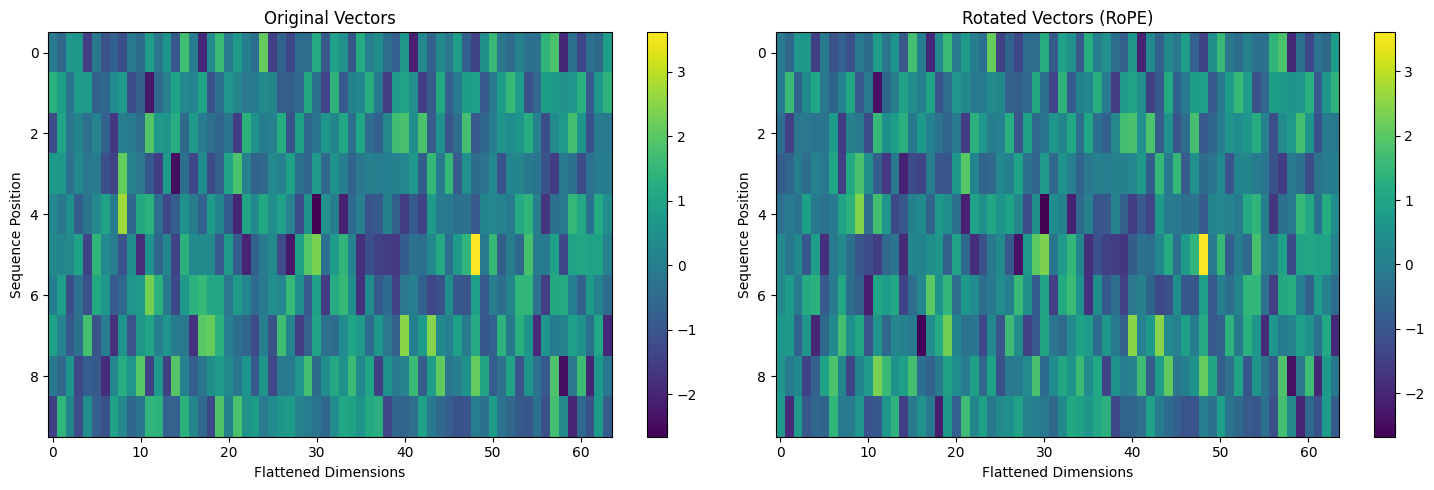

In [ ]:
class RotaryEmbedding(nn.Module):
    """
    Implements Rotary Position Embeddings (RoPE).
    RoPE applies rotation to key and query vectors based on their positions.
    """

    def __init__(self, dim: int, max_seq_len: int = 2048):
        super().__init__()
        self.dim = dim
        inv_freq = 1.0 / (10000 ** (torch.arange(0, dim, 2).float() / dim))
        position = torch.arange(max_seq_len)
        sincos = torch.einsum('i,j->ij', position, inv_freq)
        self.register_buffer('sin', sincos.sin())
        self.register_buffer('cos', sincos.cos())

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """Apply rotary embeddings to input tensor."""
        # Handle input with shape [B, L, num_heads, head_dim]
        if x.ndim == 4:
            B, L, num_heads, head_dim = x.shape
            assert head_dim % 2 == 0, "Head dimension must be even for RoPE"

            # Reshape input for rotation
            x_reshape = x.view(B, L, num_heads, -1, 2)  # [B, L, num_heads, head_dim//2, 2]

            # Prepare sin and cos for broadcasting
            sin = self.sin[:L, None, None, :].expand(L, B, num_heads, head_dim // 2).permute(1, 0, 2, 3)
            cos = self.cos[:L, None, None, :].expand(L, B, num_heads, head_dim // 2).permute(1, 0, 2, 3)

            x1 = x_reshape[..., 0]  # Even indices
            x2 = x_reshape[..., 1]  # Odd indices

            # Apply RoPE rotation
            rotated = torch.stack([
                x1 * cos - x2 * sin,
                x1 * sin + x2 * cos
            ], dim=-1)

            return rotated.flatten(-2)  # Restore shape to [B, L, num_heads, head_dim]

        # Handle input with shape [B, L, D]
        elif x.ndim == 3:
            B, L, D = x.shape
            assert D % 2 == 0, "Embedding dimension must be even for RoPE"

            # Reshape input for rotation
            x_reshape = x.view(B, L, -1, 2)  # [B, L, D//2, 2]

            # Prepare sin and cos for broadcasting
            sin = self.sin[:L, None, :].expand(L, B, D // 2).permute(1, 0, 2)  # [B, L, D/2]
            cos = self.cos[:L, None, :].expand(L, B, D // 2).permute(1, 0, 2)  # [B, L, D/2]

            x1 = x_reshape[..., 0]  # Even indices
            x2 = x_reshape[..., 1]  # Odd indices

            # Apply RoPE rotation
            rotated = torch.stack([
                x1 * cos - x2 * sin,
                x1 * sin + x2 * cos
            ], dim=-1)

            return rotated.flatten(-2)  # Restore shape to [B, L, D]

        else:
            raise ValueError(f"Unsupported input shape: {x.shape}")

def visualize_rope_embeddings():
    """Visualize how RoPE affects vector representations."""
    dim = 64
    seq_len = 10
    rope = RotaryEmbedding(dim)

    # Create sample vectors
    x = torch.randn(1, seq_len, dim)  # [1, 10, 64]
    x_rotated = rope(x)  # [1, 10, 64]

    # Reshape tensors for visualization
    x_vis = x[0].detach().numpy()  # [10, 64]
    x_rotated_vis = x_rotated[0].detach().numpy()  # [10, 64]

    # Option 1: Aggregate across embedding dimensions
    x_vis_agg = x_vis.mean(axis=-1)  # [10] (mean along embedding dimensions)
    x_rotated_vis_agg = x_rotated_vis.mean(axis=-1)  # [10]

    # Option 2: Select specific embedding dimensions for visualization
    x_vis_slice = x_vis[:, :32]  # [10, 32]
    x_rotated_vis_slice = x_rotated_vis[:, :32]  # [10, 32]

    # Option 3: Combine dimensions into a 2D array
    x_vis_combined = x_vis.reshape(seq_len, -1)  # [10, 64]
    x_rotated_vis_combined = x_rotated_vis.reshape(seq_len, -1)  # [10, 64]

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot original embeddings
    im1 = ax1.imshow(x_vis_combined, aspect='auto', cmap='viridis')
    ax1.set_title('Original Vectors')
    ax1.set_xlabel('Flattened Dimensions')
    ax1.set_ylabel('Sequence Position')
    plt.colorbar(im1, ax=ax1)

    # Plot rotated embeddings
    im2 = ax2.imshow(x_rotated_vis_combined, aspect='auto', cmap='viridis')
    ax2.set_title('Rotated Vectors (RoPE)')
    ax2.set_xlabel('Flattened Dimensions')
    ax2.set_ylabel('Sequence Position')
    plt.colorbar(im2, ax=ax2)

    plt.tight_layout()
    plt.savefig('rope_visualization.png')
    plt.show()

visualize_rope_embeddings()

In [ ]:
class CachedAttention(nn.Module):
    """
    Implements attention mechanism with KV caching for efficient inference.
    """

    def __init__(self, dim: int, num_heads: int):
        super().__init__()
        self.dim = dim
        self.num_heads = num_heads
        self.head_dim = dim // num_heads

        # Single matrix for Q, K, V projections
        self.qkv = nn.Linear(dim, 3 * dim)
        self.rope = RotaryEmbedding(self.head_dim)

        # Initialize KV cache
        self.cache_k = None
        self.cache_v = None

    def forward(
        self,
        x: torch.Tensor,
        use_cache: bool = False,
        clear_cache: bool = False
    ) -> torch.Tensor:
        """Forward pass with optional KV caching."""
        B, L, D = x.shape

        # Clear cache if requested
        if clear_cache:
            self.cache_k = None
            self.cache_v = None

        # QKV projections
        qkv = self.qkv(x)
        q, k, v = qkv.chunk(3, dim=-1)

        # Reshape for multi-head attention
        q = q.view(B, L, self.num_heads, self.head_dim)
        k = k.view(B, L, self.num_heads, self.head_dim)
        v = v.view(B, L, self.num_heads, self.head_dim)

        # Apply RoPE to queries and keys
        q = self.rope(q)
        k = self.rope(k)

        # Update KV cache
        if use_cache:
            if self.cache_k is None:
                self.cache_k = k
                self.cache_v = v
            else:
                self.cache_k = torch.cat([self.cache_k, k], dim=1)
                self.cache_v = torch.cat([self.cache_v, v], dim=1)
            k, v = self.cache_k, self.cache_v

        # Scaled dot-product attention
        scale = 1.0 / math.sqrt(self.head_dim)
        attn = torch.matmul(q, k.transpose(-2, -1)) * scale
        attn = F.softmax(attn, dim=-1)

        # Combine heads
        out = torch.matmul(attn, v)
        out = out.reshape(B, L, D)

        return out

def demonstrate_kv_cache():
    print("\nDemonstrating KV Cache:")

    model = CachedAttention(dim=64, num_heads=4)

    # Generate sample sequence
    x = torch.randn(1, 10, 64)

    # Without cache
    start_time = time.time()
    out1 = model(x, use_cache=False)
    time1 = time.time() - start_time

    # With cache
    start_time = time.time()
    out2 = model(x, use_cache=True)
    time2 = time.time() - start_time

    print(f"Time without cache: {time1:.4f}s")
    print(f"Time with cache: {time2:.4f}s")
    print(f"Speedup: {time1/time2:.2f}x")

demonstrate_kv_cache()



Demonstrating KV Cache:
Time without cache: 0.0174s
Time with cache: 0.0014s
Speedup: 12.80x


In [ ]:
@dataclass
class TransformerConfig:
    vocab_size: int = 50257
    max_seq_len: int = 2048
    dim: int = 768
    num_layers: int = 2
    num_heads: int = 2
    dropout: float = 0.1

class DecoderOnlyTransformer(nn.Module):
    """
    Complete implementation of a decoder-only transformer.
    Features:
    - Weight sharing between input/output embeddings
    - RoPE positional embeddings
    - KV caching
    - Layer normalization
    """

    def __init__(self, config: TransformerConfig):
        super().__init__()
        self.config = config

        # Token embeddings (shared with output layer)
        self.token_embedding = nn.Embedding(config.vocab_size, config.dim)

        # Attention layers
        self.layers = nn.ModuleList([
            nn.ModuleDict({
                'attention': CachedAttention(config.dim, config.num_heads),
                'ln1': nn.LayerNorm(config.dim),
                'ffn': nn.Sequential(
                    nn.Linear(config.dim, 4 * config.dim),
                    nn.GELU(),
                    nn.Linear(4 * config.dim, config.dim)
                ),
                'ln2': nn.LayerNorm(config.dim)
            }) for _ in range(config.num_layers)
        ])

        # Linear output projection reuses token_embedding weights
        self.output_projection = nn.Linear(config.dim, config.vocab_size, bias=False)
        self.output_projection.weight = self.token_embedding.weight  # Shared weights

    def forward(
        self,
        input_ids: torch.Tensor,
        use_cache: bool = False
    ) -> torch.Tensor:
        """Forward pass with optional KV caching."""
        x = self.token_embedding(input_ids)

        for layer in self.layers:
            # Self-attention with residual
            residual = x
            x = layer['ln1'](x)
            x = layer['attention'](x, use_cache=use_cache)
            x = x + residual

            # FFN with residual
            residual = x
            x = layer['ln2'](x)
            x = layer['ffn'](x)
            x = x + residual

        # Project to vocabulary
        logits = self.output_projection(x)
        return logits

def demonstrate_transformer():
    print("\nDemonstrating Complete Transformer:")

    config = TransformerConfig(
        vocab_size=1000,
        max_seq_len=128,
        dim=256,
        num_layers=4,
        num_heads=8
    )

    model = DecoderOnlyTransformer(config)

    # Generate sample input
    input_ids = torch.randint(0, config.vocab_size, (1, 64))

    # Forward pass
    logits = model(input_ids)
    print(f"Input shape: {input_ids.shape}")
    print(f"Output shape: {logits.shape}")

    # Memory usage
    param_count = sum(p.numel() for p in model.parameters())
    print(f"\nModel Parameters: {param_count:,}")

    # Verify weight sharing
    shared_weights = torch.equal(
        model.token_embedding.weight,
        model.output_projection.weight
    )
    print(f"Weight sharing verified: {shared_weights}")

demonstrate_transformer()


Demonstrating Complete Transformer:
Input shape: torch.Size([1, 64])
Output shape: torch.Size([1, 64, 1000])

Model Parameters: 3,151,872
Weight sharing verified: True


In [ ]:
!pip install memory_profiler
import torch
import numpy as np
import psutil
import sys
import time
import matplotlib.pyplot as plt
from memory_profiler import profile
import pandas as pd
from torch.utils.benchmark import Timer
from typing import List, Tuple, Dict

import pandas as pd
from timeit import Timer
from time import perf_counter



Data Type Analysis Results:
     dtype  memory_mb  matmul_time
0  float32   3.814697     0.048510
1  float64   7.629395     0.193015
2  float16   1.907349     1.933204
3    int32   3.814697     0.040149
4    int64   7.629395     0.037658
5     bool   0.953674     0.035375

Visualization saved as 'datatype_analysis_fixed.png'.


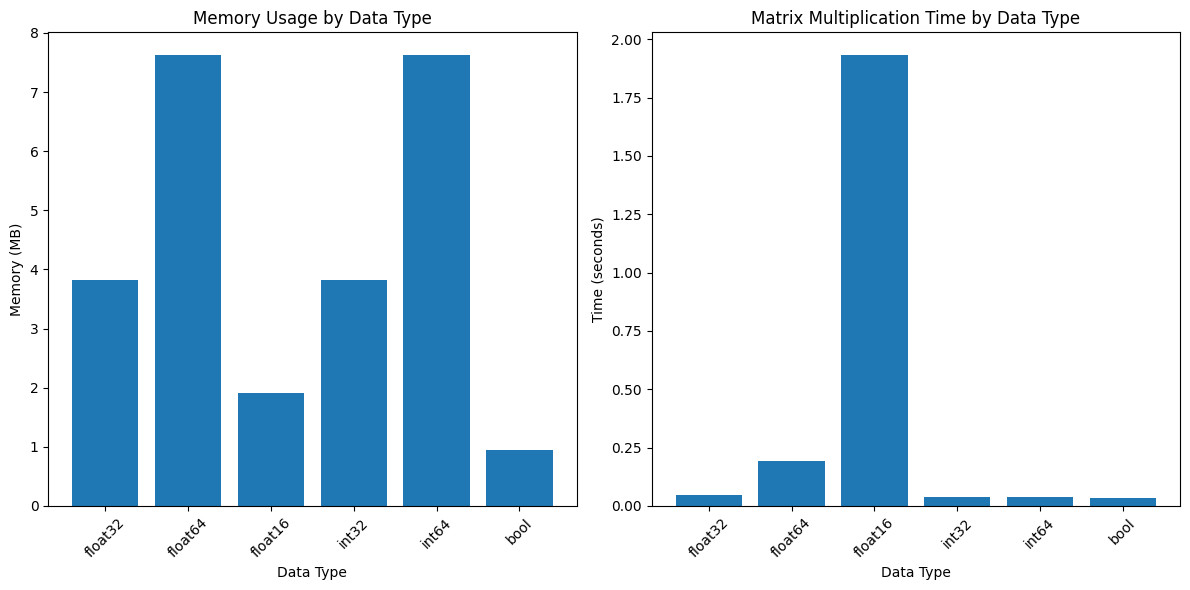

In [ ]:
def analyze_datatypes():
    """
    Analyze memory usage and computation speed for various data types in PyTorch.
    """
    size = (1000, 1000)  # Matrix size

    float_types = {
        'float32': torch.float32,
        'float64': torch.float64,
        'float16': torch.float16,
    }
    int_types = {
        'int32': torch.int32,
        'int64': torch.int64,
        'bool': torch.bool
    }

    results = []

    # Analyze floating-point types
    for name, dtype in float_types.items():
        tensor = torch.randn(size, dtype=dtype)  # Random tensor

        # Measure memory usage
        memory = tensor.element_size() * tensor.nelement() / (1024 * 1024)  # Memory in MB

        # Measure computation time
        start_time = perf_counter()
        for _ in range(100):  # Perform 100 iterations
            torch.matmul(tensor, tensor)
        end_time = perf_counter()

        speed = (end_time - start_time) / 100  # Average time per operation

        results.append({
            'dtype': name,
            'memory_mb': memory,
            'matmul_time': speed
        })

    # Analyze integer types
    for name, dtype in int_types.items():
        if dtype == torch.bool:
            tensor = torch.randint(0, 2, size, dtype=dtype)  # Boolean tensor
        else:
            tensor = torch.randint(0, 100, size, dtype=dtype)  # Integer tensor

        # Measure memory usage
        memory = tensor.element_size() * tensor.nelement() / (1024 * 1024)  # Memory in MB

        # Measure computation time (convert to float for matmul)
        start_time = perf_counter()
        for _ in range(100):  # Perform 100 iterations
            torch.matmul(tensor.float(), tensor.float())
        end_time = perf_counter()

        speed = (end_time - start_time) / 100  # Average time per operation

        results.append({
            'dtype': name,
            'memory_mb': memory,
            'matmul_time': speed
        })

    # Convert results to DataFrame for display
    df = pd.DataFrame(results)
    print("\nData Type Analysis Results:")
    print(df)

    # Visualize the results
    plt.figure(figsize=(12, 6))

    # Memory usage plot
    plt.subplot(1, 2, 1)
    plt.bar(df['dtype'], df['memory_mb'])
    plt.title('Memory Usage by Data Type')
    plt.ylabel('Memory (MB)')
    plt.xlabel('Data Type')
    plt.xticks(rotation=45)

    # Computation time plot
    plt.subplot(1, 2, 2)
    plt.bar(df['dtype'], df['matmul_time'])
    plt.title('Matrix Multiplication Time by Data Type')
    plt.ylabel('Time (seconds)')
    plt.xlabel('Data Type')
    plt.xticks(rotation=45)

    # Save and show plots
    plt.tight_layout()
    plt.savefig('datatype_analysis_fixed.png')
    print("\nVisualization saved as 'datatype_analysis_fixed.png'.")
    plt.show()

# Call the function
analyze_datatypes()

In [ ]:
print("""
Memory Allocation Patterns:

1. Continuous vs Fragmented Memory:
   - Continuous: Single large block of memory
   - Fragmented: Multiple small blocks scattered in memory

   Benefits of Continuous:
   - Faster memory access (better cache utilization)
   - Less memory overhead
   - Better hardware optimization

   Drawbacks of Fragmented:
   - Cache misses
   - Memory overhead from bookkeeping
   - Slower access patterns
""")

@profile
def demonstrate_allocation_patterns():
    # 1. Continuous vs Fragmented Memory
    def continuous_allocation():
        # Allocates one large 1000x1000 tensor
        # Benefits: Single memory block, better cache utilization
        return torch.randn(1000, 1000)

    def fragmented_allocation():
        # Allocates 1000 small 32x32 tensors
        # Drawbacks: Memory fragmentation, multiple allocations, worse cache performance
        tensors = []
        for _ in range(1000):
            tensors.append(torch.randn(32, 32))
        return tensors

    # 2. In-place vs New Memory Operations
    def inplace_ops():
        # In-place operation: Modifies tensor directly
        # Benefits: No new memory allocation, memory efficient
        x = torch.randn(1000, 1000)
        x.add_(1)  # In-place addition (note the underscore)
        return x

    def new_memory_ops():
        # Creates new tensor for result
        # Drawbacks: Allocates new memory, keeps old tensor in memory
        x = torch.randn(1000, 1000)
        x = x + 1  # Creates new tensor
        return x

    # Execute and measure
    print("\nMemory Usage Comparison:")
    x1 = continuous_allocation()
    print(f"Continuous allocation size: {x1.element_size() * x1.nelement() / 1024**2:.2f} MB")

    x2 = fragmented_allocation()
    total_fragmented = sum(t.element_size() * t.nelement() for t in x2) / 1024**2
    print(f"Fragmented allocation size: {total_fragmented:.2f} MB")

    x3 = inplace_ops()
    x4 = new_memory_ops()

    return x1, x2, x3, x4

demonstrate_allocation_patterns()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 847, in enable
    sys.settrace(self.trace_memory_usage)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/local/lib/python3.10/dist-packages/memory_profiler.py", line 850, in disable
    sys.settrace(self._original_trace_function)




Memory Allocation Patterns:

1. Continuous vs Fragmented Memory:
   - Continuous: Single large block of memory
   - Fragmented: Multiple small blocks scattered in memory
   
   Benefits of Continuous:
   - Faster memory access (better cache utilization)
   - Less memory overhead
   - Better hardware optimization
   
   Drawbacks of Fragmented:
   - Cache misses
   - Memory overhead from bookkeeping
   - Slower access patterns

ERROR: Could not find file <ipython-input-31-280ea2659c94>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.

Memory Usage Comparison:
Continuous allocation size: 3.81 MB
Fragmented allocation size: 3.91 MB


(tensor([[-0.3289,  0.0599,  1.1073,  ...,  0.8535,  0.4842,  0.7714],
         [ 1.0466,  0.6503,  0.0613,  ..., -2.2939, -1.1733, -1.0573],
         [-1.2221, -1.3265, -0.3329,  ...,  0.6257, -0.3755,  0.0635],
         ...,
         [ 0.3033,  0.4280, -0.8259,  ...,  0.3915,  0.1787, -0.7060],
         [ 2.2054, -1.5733, -1.1778,  ...,  0.2382, -0.6308,  1.7360],
         [-1.6501,  0.1757,  1.1601,  ...,  0.0048, -0.4414, -0.3958]]),
 [tensor([[-0.2799, -1.2761, -1.9058,  ..., -0.2098, -0.2459,  1.0107],
          [ 1.9496,  1.8073, -0.1979,  ...,  0.7865, -1.0108,  0.1906],
          [ 0.7102, -0.8028, -0.1007,  ...,  0.2408, -0.4667, -0.3180],
          ...,
          [ 0.1663,  1.1196, -0.1866,  ...,  1.5336,  1.1532, -0.3113],
          [ 0.1833,  1.3506,  1.4042,  ..., -0.3016,  0.3808, -0.6315],
          [-0.4669, -0.1700,  2.1813,  ...,  0.5280, -1.3932, -1.0756]]),
  tensor([[ 0.6007,  1.6865,  0.1188,  ...,  0.7365, -0.5452,  0.0974],
          [ 1.3363, -1.4950, -0.1787,

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import networkx as nx
from graphviz import Digraph
from torch.autograd import Function, Variable, grad
import time
from typing import List, Dict, Tuple, Optional
from dataclasses import dataclass
from torch.utils.checkpoint import checkpoint

In [ ]:
class ComputationGraphVisualizer:
    def __init__(self):
        self.nodes = []
        self.edges = []
        self.node_attrs = {}

    def trace_tensor(self, tensor: torch.Tensor, name: str = "output"):
        """Traces a tensor's computation graph."""
        def add_node(node, name: str):
            if node not in self.nodes:
                self.nodes.append(node)
                if hasattr(node, 'variable'):
                    self.node_attrs[node] = f"{name}\n{tuple(node.variable.shape)}"
                else:
                    self.node_attrs[node] = f"{name}\n{type(node).__name__}"

        def add_parents(node):
            if hasattr(node, 'next_functions'):
                for parent in node.next_functions:
                    if parent[0] is not None:
                        self.edges.append((parent[0], node))
                        add_node(parent[0], "intermediate")
                        add_parents(parent[0])

        if tensor.grad_fn is not None:
            add_node(tensor.grad_fn, name)
            add_parents(tensor.grad_fn)

    def visualize(self, filename: str = "computation_graph"):
        """Creates a visual representation of the graph."""
        dot = Digraph()
        dot.attr(rankdir='LR')  # Left to right layout

        # Add nodes
        for node in self.nodes:
            dot.node(str(id(node)), self.node_attrs[node])

        # Add edges
        for src, dst in self.edges:
            dot.edge(str(id(src)), str(id(dst)))

        dot.render(filename, format='png', cleanup=True)

def demonstrate_graph_construction():
    # Simple computation
    x = torch.tensor([2.0], requires_grad=True)
    y = torch.tensor([3.0], requires_grad=True)

    # Build computation graph
    z = x * y
    w = torch.sin(z)
    v = torch.exp(w)
    f = v * x

    # Visualize graph
    visualizer = ComputationGraphVisualizer()
    visualizer.trace_tensor(f, "final_output")
    visualizer.visualize("basic_computation")

    print("""
    Graph Construction Steps:
    1. x * y → Creates multiplication node
    2. sin(z) → Adds sine operation
    3. exp(w) → Adds exponential
    4. v * x → Connects back to input

    Note how each operation creates a new node and edges.
    """)

demonstrate_graph_construction()


    Graph Construction Steps:
    1. x * y → Creates multiplication node
    2. sin(z) → Adds sine operation
    3. exp(w) → Adds exponential
    4. v * x → Connects back to input
    
    Note how each operation creates a new node and edges.
    


In [ ]:
@dataclass
class MemoryStats:
    allocated: float
    cached: float
    reserved: float

class GraphExecutionProfiler:
    def __init__(self):
        self.memory_stats = []
        self.execution_times = []

    def measure_memory(self) -> MemoryStats:
        if torch.cuda.is_available():
            return MemoryStats(
                allocated=torch.cuda.memory_allocated() / 1024**2,
                cached=torch.cuda.memory_cached() / 1024**2,
                reserved=torch.cuda.memory_reserved() / 1024**2
            )
        return MemoryStats(0, 0, 0)

    def profile_execution(self, func, *args, **kwargs):
        start_mem = self.measure_memory()
        start_time = time.time()

        result = func(*args, **kwargs)

        end_time = time.time()
        end_mem = self.measure_memory()

        self.memory_stats.append((start_mem, end_mem))
        self.execution_times.append(end_time - start_time)

        return result

    def report(self):
        print("\nExecution Profile:")
        for i, ((start_mem, end_mem), exec_time) in enumerate(zip(self.memory_stats, self.execution_times)):
            print(f"\nIteration {i+1}:")
            print(f"Execution time: {exec_time*1000:.2f}ms")
            print(f"Memory allocated: {end_mem.allocated - start_mem.allocated:.2f}MB")
            print(f"Memory cached: {end_mem.cached - start_mem.cached:.2f}MB")

def demonstrate_graph_execution():
    profiler = GraphExecutionProfiler()

    def complex_computation(x: torch.Tensor, depth: int) -> torch.Tensor:
        for _ in range(depth):
            x = torch.relu(torch.matmul(x, x))
        return x

    # Profile different graph sizes
    sizes = [100, 200, 400]
    for size in sizes:
        x = torch.randn(size, size, requires_grad=True)
        profiler.profile_execution(complex_computation, x, depth=3)

    profiler.report()

demonstrate_graph_execution()


Execution Profile:

Iteration 1:
Execution time: 0.94ms
Memory allocated: 0.00MB
Memory cached: 0.00MB

Iteration 2:
Execution time: 6.16ms
Memory allocated: 0.00MB
Memory cached: 0.00MB

Iteration 3:
Execution time: 43.64ms
Memory allocated: 0.00MB
Memory cached: 0.00MB
